In [1]:
import os
import json

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression as Logit
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier as XGB

from pipeline import ReviewPipeline

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

cwd = os.getcwd()
print(f'cwd: {cwd}')
datapath = os.path.join(cwd, '../data')
print(f'data files: {[file for file in os.listdir(datapath)]}')

cwd: /Users/grantham/Documents/code/boulevard/django-react/meta/analysis
data files: ['loans.csv']


In [2]:
loans = pd.read_csv(os.path.join(datapath, 'loans.csv'))
print(f'loans: \n \t description: {loans.info()} \n \t {loans.head(1).T}')
loans['loan_status'] = loans['loan_status'] == 'Fully Paid'

/Users/grantham/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB
loans: 
 	 description: None 
 	                                                                                             0
id                                                                                   68407277
member_id                                                                                 NaN
loan_amnt                                                                                3600
funded_amnt                                                                              

In [3]:
with open(os.path.join(cwd, 'data-elements.json'), 'r') as file:
    elements = json.load(file)

train, test = train_test_split(loans, test_size=0.3)

/Users/grantham/Documents/code/boulevard/django-react/meta/analysis/pipeline.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'] ,format='%m%Y', errors='coerce').dt.to_period('m')
/Users/grantham/Documents/code/boulevard/django-react/meta/analysis/pipeline.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_d'] = pd.to_datetime(df['issue_d'] ,format='%m%Y', errors='coerce').dt.to_period('m')
/Users/grantham/.pyenv/versions/3.8.2/lib/

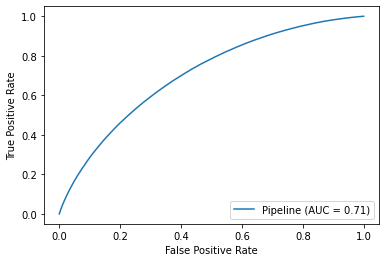

In [4]:
logit_pipe = ReviewPipeline(elements, Logit())
logit_pipe.fit(train)
logit_pipe.score(test)

/Users/grantham/Documents/code/boulevard/django-react/meta/analysis/pipeline.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'] ,format='%m%Y', errors='coerce').dt.to_period('m')
/Users/grantham/Documents/code/boulevard/django-react/meta/analysis/pipeline.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_d'] = pd.to_datetime(df['issue_d'] ,format='%m%Y', errors='coerce').dt.to_period('m')
/Users/grantham/.pyenv/versions/3.8.2/lib/

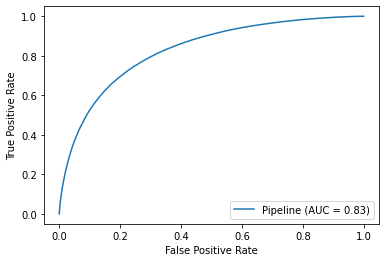

In [5]:
xgb_pipe = ReviewPipeline(elements, XGB())
xgb_pipe.fit(train)
xgb_pipe.score(test)

In [6]:
cases, _ = train_test_split(test, train_size=10000)

cases['logit'] = logit_pipe.predict(cases)[:,1]
cases['xgb'] = xgb_pipe.predict(cases)[:,1]

fixture = logit_pipe.create_fixture(cases)

filename = f'../../backend/fixtures/applicants.json'
if os.path.exists(filename):
    os.remove(filename)
with open(filename, 'w') as file:
    file.write(fixture)

/Users/grantham/Documents/code/boulevard/django-react/meta/analysis/pipeline.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'] ,format='%m%Y', errors='coerce').dt.to_period('m')
/Users/grantham/Documents/code/boulevard/django-react/meta/analysis/pipeline.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_d'] = pd.to_datetime(df['issue_d'] ,format='%m%Y', errors='coerce').dt.to_period('m')
<ipython-input-6-b7a487fa893c>:3: SettingW